In [50]:
import pandas
import numpy
from prettytable import PrettyTable, ALL
from matplotlib import pyplot
from modules.dataframes import textiles
from scipy.cluster.hierarchy import linkage, dendrogram

In [51]:

########################################################################################################################

warps = textiles['warp_nominal']
wefts = textiles['weft_nominal']
min_warp = min(warps)
max_warp = max(warps)
min_weft = min(wefts)
max_weft = max(wefts)
range_warp = round(max_warp - min_warp, 3)
range_weft = round(max_weft - min_weft, 3)
mean_warp = round(warps.mean(), 3)
mean_weft = round(wefts.mean(), 3)
mode_warp = warps.mode()[0]
mode_weft = wefts.mode()[0]
median_warp = warps.median()
median_weft = wefts.median()

warps_unique = warps.unique()
print(len(warps_unique))

wefts_unique = wefts.unique()
print(len(wefts_unique))

########################################################################################################################


17
21


In [52]:

# Перцентили по основе;

warp_percentile_1 = numpy.percentile(warps.to_numpy(), 10)
warp_percentile_2 = numpy.percentile(warps.to_numpy(), 20)
warp_percentile_3 = numpy.percentile(warps.to_numpy(), 30)
warp_percentile_4 = numpy.percentile(warps.to_numpy(), 40)
warp_percentile_5 = numpy.percentile(warps.to_numpy(), 50)

In [53]:

########################################################################################################################

table = PrettyTable()
table.hrules = ALL
table.field_names = ['ПАРАМЕТР', 'ЗНАЧЕНИЕ']
table.add_row(["Минимальное значение толщины по основе", min_warp])
table.add_row(["Максимальное значение толщины по основе", max_warp])
table.add_row(["Разброс значение по основе", range_warp])
table.add_row(["Разброс значений по утку", range_weft])
table.add_row(["Среднее значение по основе", mean_warp])
table.add_row(["Среднее значение ро утку", mean_weft])
table.add_row(["Мода толщины по основе", mode_warp])
table.add_row(["Мода толщины по утку", mode_weft])
table.add_row(["Медиана толщины по основе", median_warp])
table.add_row(["Медиана толщины по утку", median_weft])
print(table)

########################################################################################################################


+-----------------------------------------+----------+
|                 ПАРАМЕТР                | ЗНАЧЕНИЕ |
+-----------------------------------------+----------+
|  Минимальное значение толщины по основе |   0.2    |
+-----------------------------------------+----------+
| Максимальное значение толщины по основе |   1.15   |
+-----------------------------------------+----------+
|        Разброс значение по основе       |   0.95   |
+-----------------------------------------+----------+
|         Разброс значений по утку        |   4.15   |
+-----------------------------------------+----------+
|        Среднее значение по основе       |  0.471   |
+-----------------------------------------+----------+
|         Среднее значение ро утку        |   0.53   |
+-----------------------------------------+----------+
|          Мода толщины по основе         |   0.5    |
+-----------------------------------------+----------+
|           Мода толщины по утку          |   0.45   |
+---------

In [54]:
table = PrettyTable()
table.field_names = ['ПЕРЦЕНТИЛИ ПО ОСНОВЕ', 'ЗНАЧЕНИЕ']
table.add_row(['1', warp_percentile_1])
table.add_row(['2', warp_percentile_2])
table.add_row(['3', warp_percentile_3])
table.add_row(['4', warp_percentile_4])
table.add_row(['5', warp_percentile_5])
# table.add_row(['6', warp_percentile_6])
# table.add_row(['7', warp_percentile_7])
print(table)

+----------------------+---------------------+
| ПЕРЦЕНТИЛИ ПО ОСНОВЕ |       ЗНАЧЕНИЕ      |
+----------------------+---------------------+
|          1           |         0.3         |
|          2           |         0.35        |
|          3           |         0.4         |
|          4           | 0.45000000000000007 |
|          5           |         0.45        |
+----------------------+---------------------+


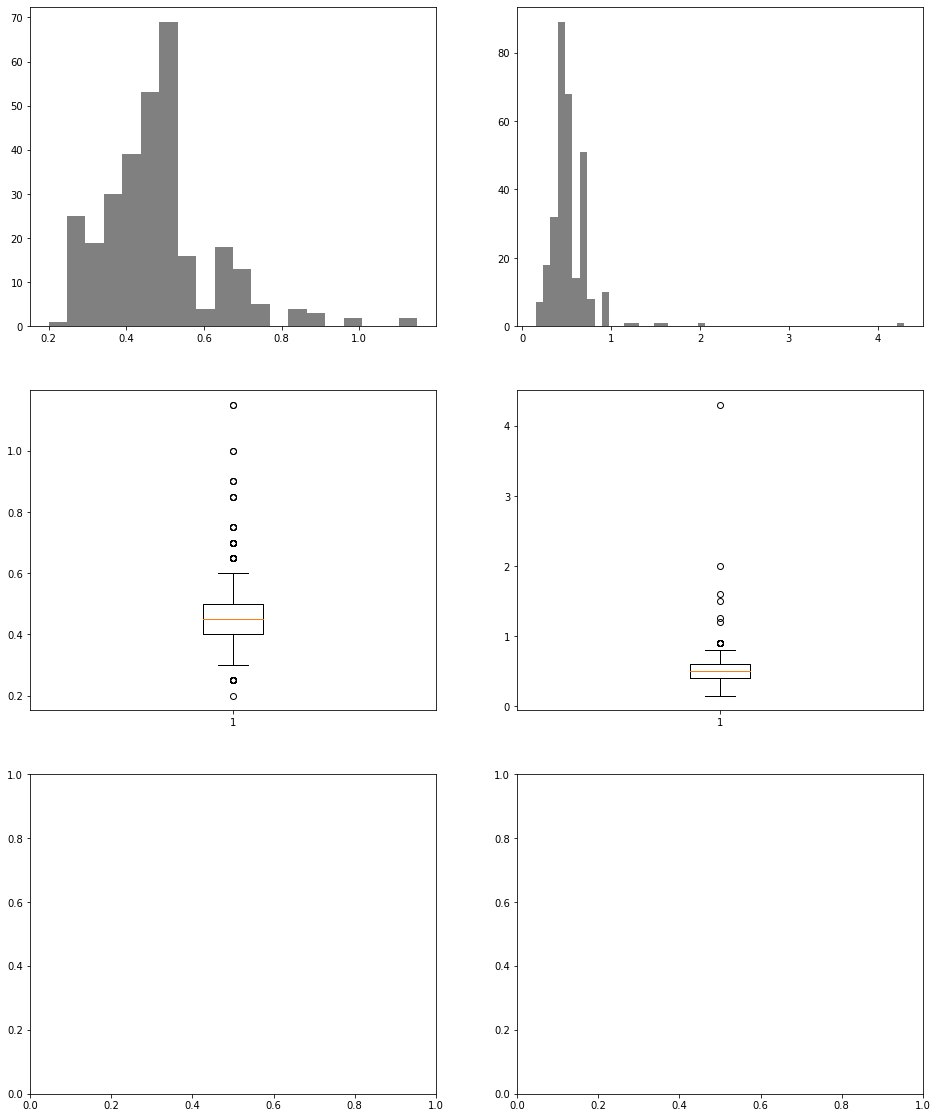

In [55]:
_, ax = pyplot.subplots(nrows=3, ncols=2, figsize=(16, 20))
ax[0][0].hist(warps, bins=20, color='gray')
ax[0][1].hist(wefts, bins=50, color='gray')
ax[1][0].boxplot(warps)
ax[1][1].boxplot(wefts)
# ax[2][0].bar(warps, warps_unique, color='gray')
# ax[2][0].hist2d(warps, wefts)
pyplot.show()

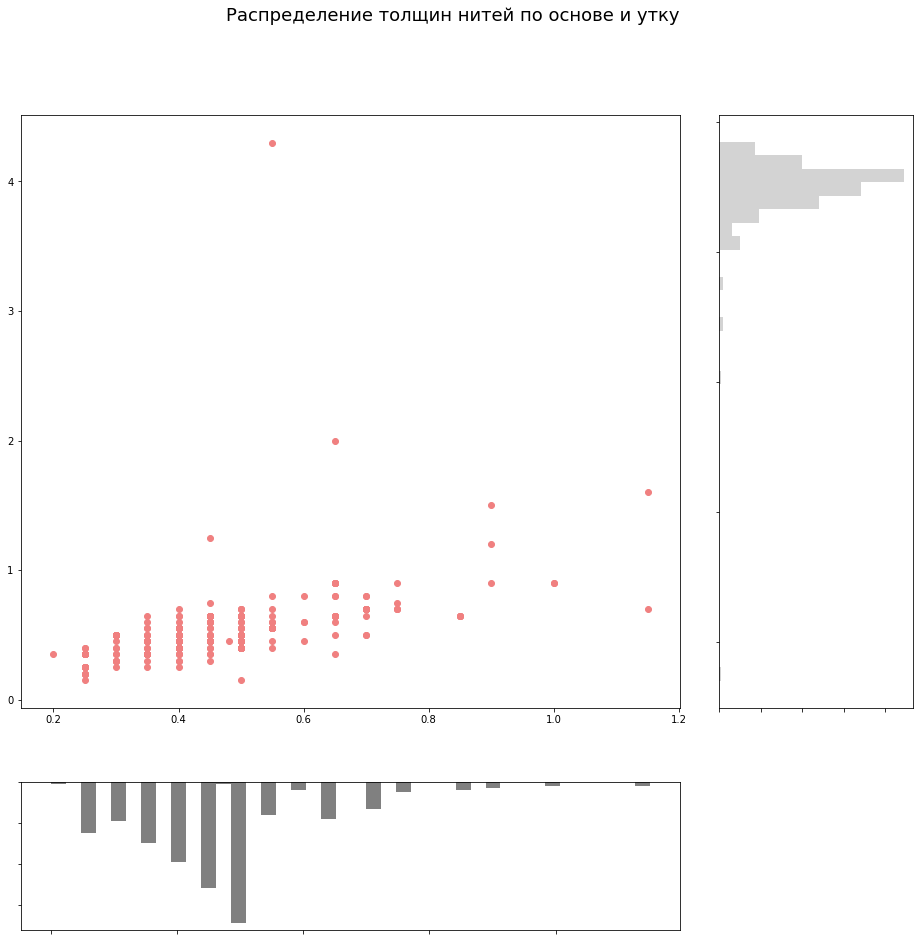

In [56]:
fig = pyplot.figure(figsize=(16, 15))
grid = pyplot.GridSpec(4, 4, hspace=0.5, wspace=0.2)

fig.suptitle('Распределение толщин нитей по основе и утку', fontsize=18)

ax_main = fig.add_subplot(grid[:-1, :-1])

ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_right.invert_yaxis()

ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
ax_bottom.invert_yaxis()

ax_main.scatter(warps, wefts, color='lightcoral')
ax_bottom.hist(warps, 40, color='gray', histtype='stepfilled', orientation='vertical')
ax_right.hist(wefts, 40, color='lightgray', histtype='stepfilled', orientation='horizontal')

pyplot.show()

In [57]:
# Меры центральной тенденции и меры разброса для нитей по основе и по утку

########################################################################################################################

min_warp = min(textiles['warp_nominal'])
max_warp = max(textiles['warp_nominal'])
range_warp = max_warp - min_warp

print("Минимальное значение толщины нити по основе - " + str(round(min_warp, 3)))
print("Максимальное значение толщины нити по основе - " + str(round(max_warp, 3)))
print("Разброс толщины нити по основе - " + str(round(range_warp, 3)))
print()
print("**********************************************************************")
print()

########################################################################################################################

min_weft = min(textiles['weft_nominal'])
max_weft = max(textiles['weft_nominal'])
range_weft = max_weft - min_weft

print("Минимальное значение толщины нити по утку - " + str(round(min_weft, 3)))
print("Максимальное значение толщины нити по утку - " + str(round(max_weft, 3)))
print("Разброс толщины нити по утку - " + str(round(range_weft, 3)))

########################################################################################################################

print()
print("**********************************************************************")
print()
print("Мода толщины нити по основе - " + str(round(textiles['warp_nominal'].mode()[0], 3)))
print("Мода толщины нити по утку - " + str(round(textiles['weft_nominal'].mode()[0], 3)))
print()
print("**********************************************************************")
print()

########################################################################################################################


Минимальное значение толщины нити по основе - 0.2
Максимальное значение толщины нити по основе - 1.15
Разброс толщины нити по основе - 0.95

**********************************************************************

Минимальное значение толщины нити по утку - 0.15
Максимальное значение толщины нити по утку - 4.3
Разброс толщины нити по утку - 4.15

**********************************************************************

Мода толщины нити по основе - 0.5
Мода толщины нити по утку - 0.45

**********************************************************************



In [58]:
# Распределение по направлению крутки нити;

########################################################################################################################

textiles_twist_warp_s = textiles[textiles['twist_warp'] == 'S']
print(len(textiles_twist_warp_s))

########################################################################################################################

textiles_twist_weft_s = textiles[textiles['twist_weft'] == 'S']
print(len(textiles_twist_weft_s))

########################################################################################################################

textiles_twist_warp_z = textiles[textiles['twist_warp'] == 'Z']
print(len(textiles_twist_warp_z))

########################################################################################################################

textiles_twist_weft_z = textiles[textiles['twist_weft'] == 'Z']
print(len(textiles_twist_weft_z))

########################################################################################################################


300
296
1
1


In [59]:

########################################################################################################################

textiles_angle_warp_loose = textiles[textiles['angle_warp'] == 'loose']

########################################################################################################################

textiles_angle_warp_medium = textiles[textiles['angle_warp'] == 'medium']

########################################################################################################################

textiles_angle_warp_uneven = textiles[textiles['angle_warp'] == 'uneven']

########################################################################################################################

textiles_angle_weft_loose = textiles[textiles['angle_weft'] == 'loose']

########################################################################################################################

textiles_angle_weft_medium = textiles[textiles['angle_weft'] == 'medium']

########################################################################################################################

textiles_angle_weft_uneven = textiles[textiles['angle_weft'] == 'uneven']

########################################################################################################################


In [60]:
table = PrettyTable()
table.hrules = ALL
table.field_names = ['ПАРАМЕТР', 'ЗНАЧЕНИЕ']
table.add_row(['ТКАНЕЙ СО СЛАБОЙ КРУТКОЙ ПО ОСНОВЕ', len(textiles_angle_warp_loose)])
table.add_row(['ТКАНЕЙ СО СРЕДНЕЙ КРУТКОЙ ПО ОСНОВЕ', len(textiles_angle_warp_medium)])
table.add_row(['ТКАНЕЙ', len(textiles_angle_warp_uneven)])
table.add_row(['ТКАНЕЙ СО СЛАБОЙ КРУТКОЙ ПО УТКУ', len(textiles_angle_weft_loose)])
table.add_row(['ТКАНЕЙ СО СРЕДНЕЙ КРУТКОЙ ПО УТКУ', len(textiles_angle_weft_medium)])
table.add_row(['ТКАНЕЙ', len(textiles_angle_weft_uneven)])
print(table)

+-------------------------------------+----------+
|               ПАРАМЕТР              | ЗНАЧЕНИЕ |
+-------------------------------------+----------+
|  ТКАНЕЙ СО СЛАБОЙ КРУТКОЙ ПО ОСНОВЕ |    59    |
+-------------------------------------+----------+
| ТКАНЕЙ СО СРЕДНЕЙ КРУТКОЙ ПО ОСНОВЕ |   215    |
+-------------------------------------+----------+
|                ТКАНЕЙ               |    29    |
+-------------------------------------+----------+
|   ТКАНЕЙ СО СЛАБОЙ КРУТКОЙ ПО УТКУ  |    52    |
+-------------------------------------+----------+
|  ТКАНЕЙ СО СРЕДНЕЙ КРУТКОЙ ПО УТКУ  |   229    |
+-------------------------------------+----------+
|                ТКАНЕЙ               |    18    |
+-------------------------------------+----------+


In [61]:
# Сравнение мер центральной тенденции

########################################################################################################################

print("Среднее значение толщины нити по основе для тканей со слабой круткой по основе - " + str(round(textiles_angle_warp_loose['warp_nominal'].mean(), 3)))
print("Среднее значение толщины нити по основе для тканей со средней круткой по основе - " + str(round(textiles_angle_warp_medium['warp_nominal'].mean(), 3)))
print("" + str(round(textiles_angle_warp_uneven['warp_nominal'].mean(), 3)))

########################################################################################################################

print("Среднее значение толщины нити по основе для тканей со слабой круткой по утку - " + str(round(textiles_angle_weft_loose['warp_nominal'].mean(), 3)))
print("" + str(round(textiles_angle_weft_medium['warp_nominal'].mean(), 3)))
print("" + str(round(textiles_angle_weft_uneven['warp_nominal'].mean(), 3)))

########################################################################################################################


Среднее значение толщины нити по основе для тканей со слабой круткой по основе - 0.498
Среднее значение толщины нити по основе для тканей со средней круткой по основе - 0.465
0.462
Среднее значение толщины нити по основе для тканей со слабой круткой по утку - 0.528
0.449
0.553


In [62]:

# Вычисление квартилей

########################################################################################################################

warp_quartile_1, warp_quartile_2, warp_quartile_3 = textiles.warp_nominal.quantile([0.25, 0.5, 0.75])

########################################################################################################################

weft_quartile_1, weft_quartile_2, weft_quartile_3 = textiles.weft_nominal.quantile([0.25, 0.5, 0.75])

########################################################################################################################

print("Первый квартиль толщины по основе - " + str(warp_quartile_1))
print("Второй квартиль толщины по основе - " + str(warp_quartile_2))
print("Третий квартиль толщины по основе - " + str(warp_quartile_3))
print("\n*********************************************\n")
print("Первый квартиль толщины по утку - " + str(weft_quartile_1))
print("Второй квартиль толщины по утку - " + str(weft_quartile_2))
print("Третий квартиль толщины по утку - " + str(weft_quartile_3))

########################################################################################################################


Первый квартиль толщины по основе - 0.4
Второй квартиль толщины по основе - 0.45
Третий квартиль толщины по основе - 0.5

*********************************************

Первый квартиль толщины по утку - 0.4
Второй квартиль толщины по утку - 0.5
Третий квартиль толщины по утку - 0.6


In [63]:

# Вычисление выбросов по толщине по основе (на основе межквартильного расстояния);

########################################################################################################################

warp_lower_border = round(warp_quartile_1 - 1.5 * (warp_quartile_3 - warp_quartile_1), 3)
warp_upper_border = round(warp_quartile_1 + 1.5 * (warp_quartile_3 - warp_quartile_1), 3)

########################################################################################################################

print("" + str(warp_lower_border))
print("" + str(warp_upper_border))

########################################################################################################################


0.25
0.55


In [64]:

# Вычисление выбросов по толщине по утку (на основе межквартильного расстояния);

########################################################################################################################

weft_lower_border = round(weft_quartile_1 - 1.5 * (weft_quartile_3 - weft_quartile_1), 3)
weft_upper_border = round(weft_quartile_1 + 1.5 * (weft_quartile_3 - weft_quartile_1), 3)

########################################################################################################################

print("" + str(weft_lower_border))
print("" + str(weft_upper_border))

########################################################################################################################


0.1
0.7


In [65]:

########################################################################################################################

warps_cleared = textiles.query('warp_nominal <= 0.55 and warp_nominal >= 0.25')

########################################################################################################################

wefts_cleared = textiles.query('weft_nominal >=0.1 and weft_nominal <= 0.7')

########################################################################################################################

warps_outliers_lower = textiles.query('warp_nominal < 0.25')
warps_outliers_upper = textiles.query('warp_nominal > 0.55')

########################################################################################################################

wefts_outliers_lower = textiles.query('weft_nominal < 0.1')
wefts_outliers_upper = textiles.query('weft_nominal > 0.7')

########################################################################################################################

warps_outliers = warps_outliers_lower.merge(warps_outliers_upper, how='outer')
wefts_outliers = wefts_outliers_lower.merge(wefts_outliers_upper, how='outer')
warps_outliers_percent = round((len(warps_outliers) / len(textiles)) * 100, 3)
wefts_outliers_percent = round((len(wefts_outliers) / len(textiles)) * 100, 3)
outliers_percent = round(((len(warps_outliers) + len(wefts_outliers))/ len(textiles)) * 100, 3)


In [66]:
table = PrettyTable()
table.hrules = ALL
table.field_names = ['ПАРАМЕТР', 'ЗНАЧЕНИЕ']
table.add_row(['Количество выбросов по основе', len(warps_outliers)])
table.add_row(['Количество выбросов по основе', len(wefts_outliers)])
table.add_row(['Процент выбросов по основе', warps_outliers_percent])
table.add_row(['Процент выбросов по утку', wefts_outliers_percent])
table.add_row(['Всего выбросов по толщине тканей', outliers_percent])
print(table)

+----------------------------------+----------+
|             ПАРАМЕТР             | ЗНАЧЕНИЕ |
+----------------------------------+----------+
|  Количество выбросов по основе   |    52    |
+----------------------------------+----------+
|  Количество выбросов по основе   |    24    |
+----------------------------------+----------+
|    Процент выбросов по основе    |  17.162  |
+----------------------------------+----------+
|     Процент выбросов по утку     |  7.921   |
+----------------------------------+----------+
| Всего выбросов по толщине тканей |  25.083  |
+----------------------------------+----------+


In [67]:
table = PrettyTable()
table.hrules = ALL
table.field_names = ["ПАРАМЕТР", "ЗНАЧЕНИЕ"]
table.add_row(["Данных без учёта выбросов по толщине основы", len(warps_cleared)])
table.add_row(["Данных без учёта выбросов по толщине утка", len(wefts_cleared)])
table.add_row(["Выбросов по толщине основы", len(warps_outliers_lower) + len(warps_outliers_upper)])
table.add_row(["Выбросов по толщине утка", ''])
print(table)

+---------------------------------------------+----------+
|                   ПАРАМЕТР                  | ЗНАЧЕНИЕ |
+---------------------------------------------+----------+
| Данных без учёта выбросов по толщине основы |   251    |
+---------------------------------------------+----------+
|  Данных без учёта выбросов по толщине утка  |   279    |
+---------------------------------------------+----------+
|          Выбросов по толщине основы         |    52    |
+---------------------------------------------+----------+
|           Выбросов по толщине утка          |          |
+---------------------------------------------+----------+


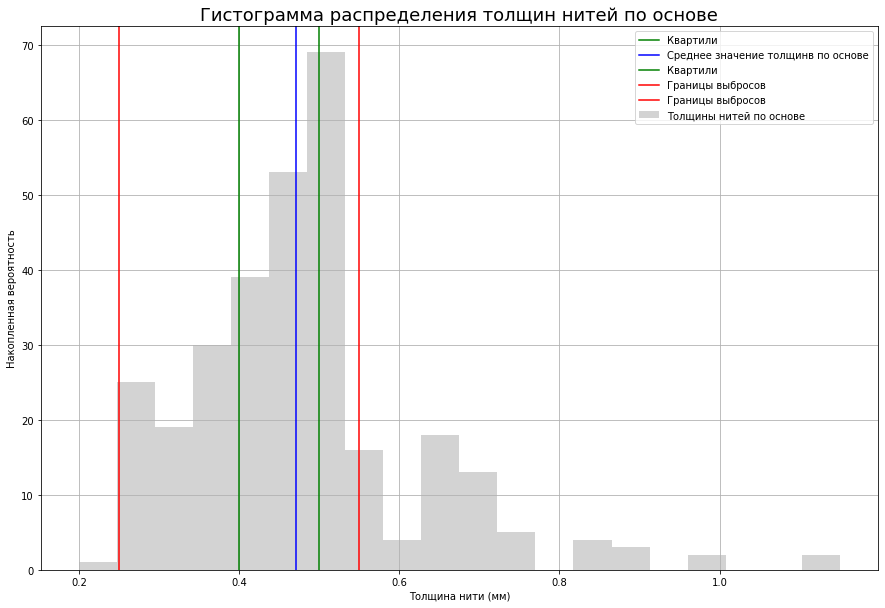

In [68]:

########################################################################################################################

fig = pyplot.figure(figsize=(15, 10))
ax = fig.add_subplot()
pyplot.grid()
pyplot.axvline(warp_quartile_1, color='green', label='Квартили')
pyplot.axvline(mean_warp, color='blue', label='Среднее значение толщинв по основе')
pyplot.axvline(warp_quartile_3, color='green', label='Квартили')
pyplot.axvline(warp_lower_border, color='red', label='Границы выбросов')
pyplot.axvline(warp_upper_border, color='red', label='Границы выбросов')
textiles.warp_nominal.hist(ax=ax, bins=20, color='lightgray', label='Толщины нитей по основе')
ax.set_title('Гистограмма распределения толщин нитей по основе', fontsize=18)
ax.set_xlabel('Толщина нити (мм)')
ax.set_ylabel('Накопленная вероятность')
ax.legend()
pyplot.show()

########################################################################################################################


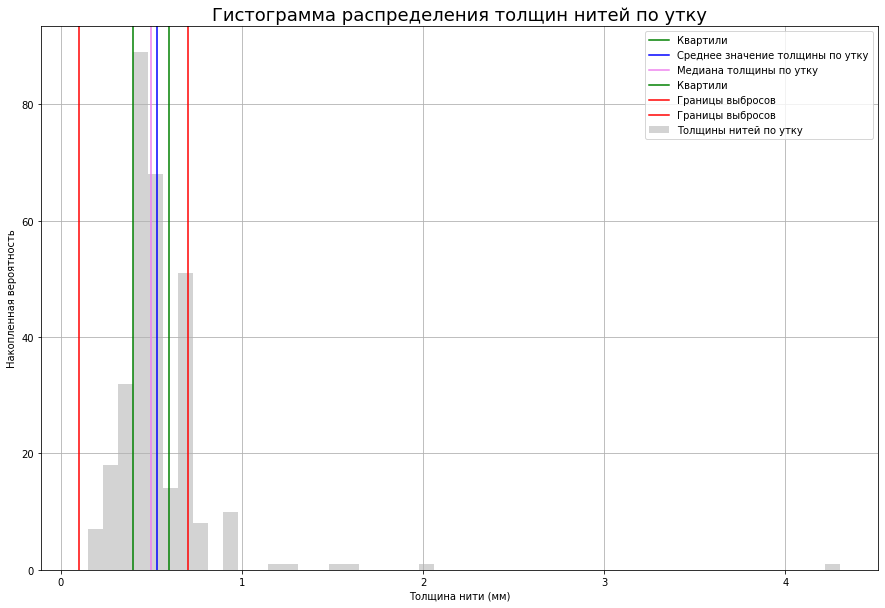

In [69]:

########################################################################################################################

fig, ax = pyplot.subplots(figsize=(15, 10))
pyplot.axvline(weft_quartile_1, color='green', label='Квартили')
pyplot.axvline(mean_weft, color='blue', label='Среднее значение толщины по утку')
pyplot.axvline(median_weft, color='violet', label='Медиана толщины по утку')
pyplot.axvline(weft_quartile_3, color='green', label='Квартили')
pyplot.axvline(weft_lower_border, color='red', label='Границы выбросов')
pyplot.axvline(weft_upper_border, color='red', label='Границы выбросов')
textiles.weft_nominal.hist(ax=ax, bins=50, color='lightgray', label='Толщины нитей по утку')
ax.set_title('Гистограмма распределения толщин нитей по утку', fontsize=18)
ax.set_xlabel('Толщина нити (мм)')
ax.set_ylabel('Накопленная вероятность')
ax.legend()
pyplot.show()

########################################################################################################################


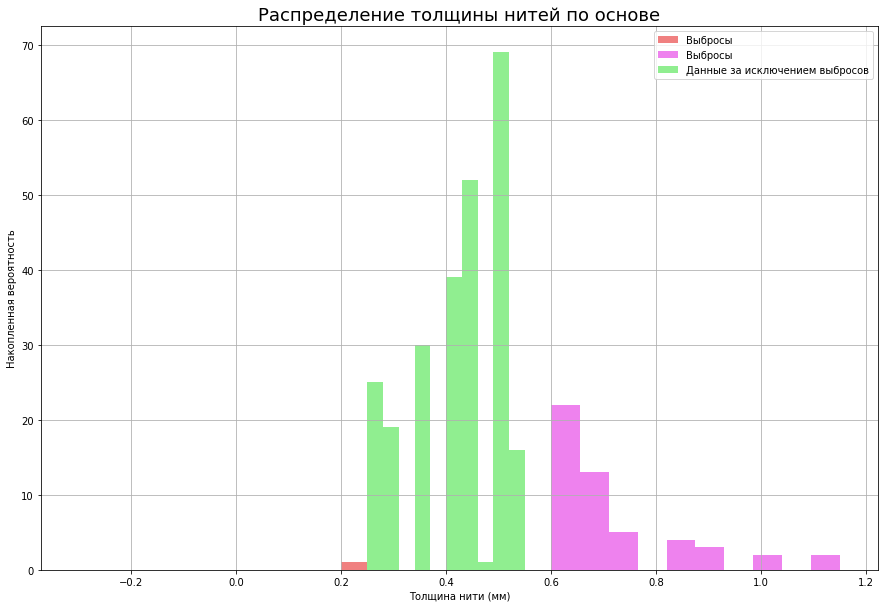

In [70]:

# График распределения толщин по основе;

########################################################################################################################

fig, ax = pyplot.subplots(figsize=(15, 10))
warps_outliers_lower.warp_nominal.hist(ax=ax, color='lightcoral', label='Выбросы')
warps_outliers_upper.warp_nominal.hist(ax=ax, color='violet', label='Выбросы')
warps_cleared.warp_nominal.hist(ax=ax, color='lightgreen', label='Данные за исключением выбросов')
ax.set_title('Распределение толщины нитей по основе', fontsize=18)
ax.set_xlabel('Толщина нити (мм)')
ax.set_ylabel('Накопленная вероятность')
ax.legend()
pyplot.show()

########################################################################################################################


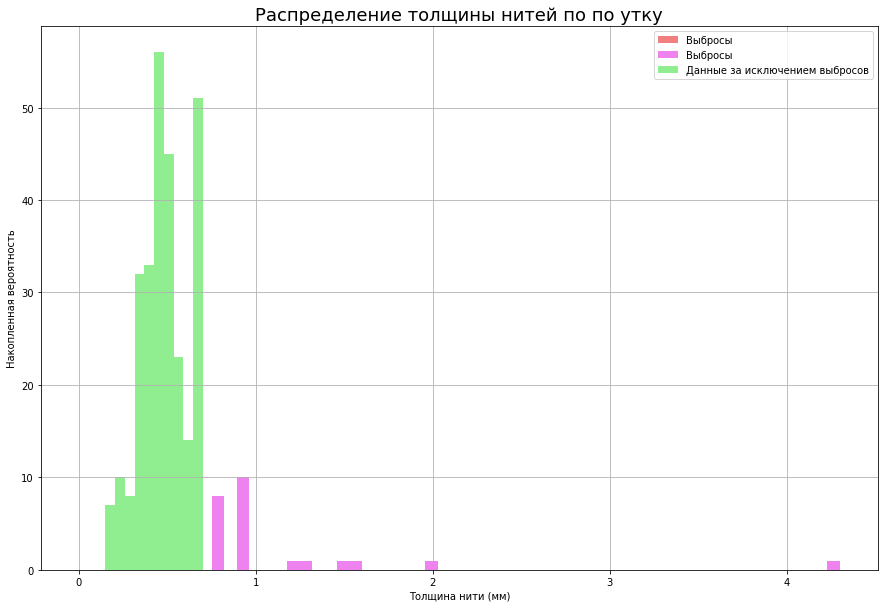

In [71]:

########################################################################################################################

fig, ax = pyplot.subplots(figsize=(15, 10))
wefts_outliers_lower.weft_nominal.hist(ax=ax, color='lightcoral', label='Выбросы')

# pyplot.hist(threads_outliers_weft_upper.weft_nominal, bins=14)
wefts_outliers_upper.weft_nominal.hist(ax=ax, bins=50, color='violet', label='Выбросы')
wefts_cleared.weft_nominal.hist(ax=ax, bins=10, color='lightgreen', label='Данные за исключением выбросов')
ax.set_title('Распределение толщины нитей по по утку', fontsize=18)
ax.set_xlabel('Толщина нити (мм)')
ax.set_ylabel('Накопленная вероятность')
ax.legend()
pyplot.show()

########################################################################################################################


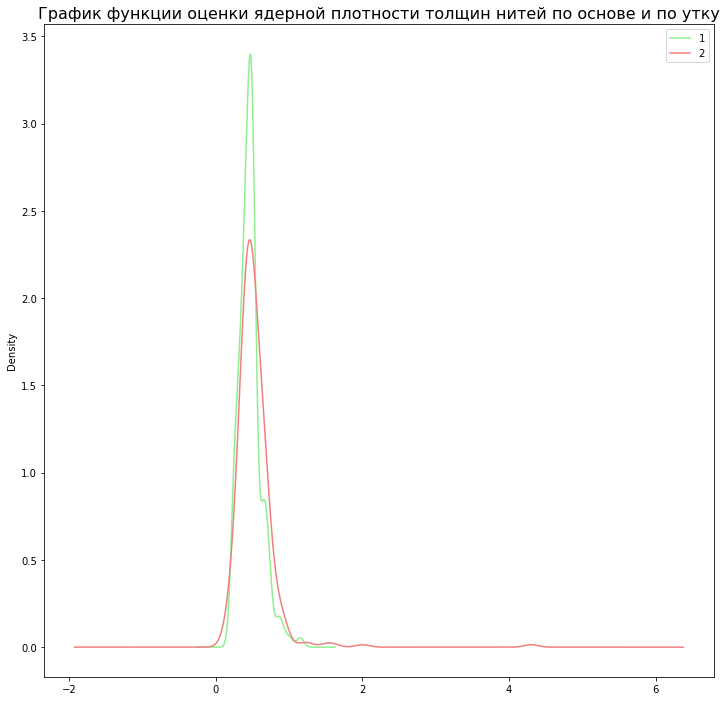

In [72]:
fig, ax = pyplot.subplots(figsize=(12, 12))
warps.plot.kde(color='lightgreen', label='1')
wefts.plot.kde(color='lightcoral', label='2')
ax.set_title('График функции оценки ядерной плотности толщин нитей по основе и по утку', fontsize=16)
ax.legend()

In [73]:
warps_list = textiles.warp_nominal.tolist()
wefts_list = textiles.weft_nominal.tolist()

warps_angles = textiles.angle_warp.to_list()
wefts_angles = textiles.angle_weft.to_list()

warps_wefts_list = []
for num, item in enumerate(warps_list):
    warps_wefts_list.append((warps_list[num], wefts_list[num]))

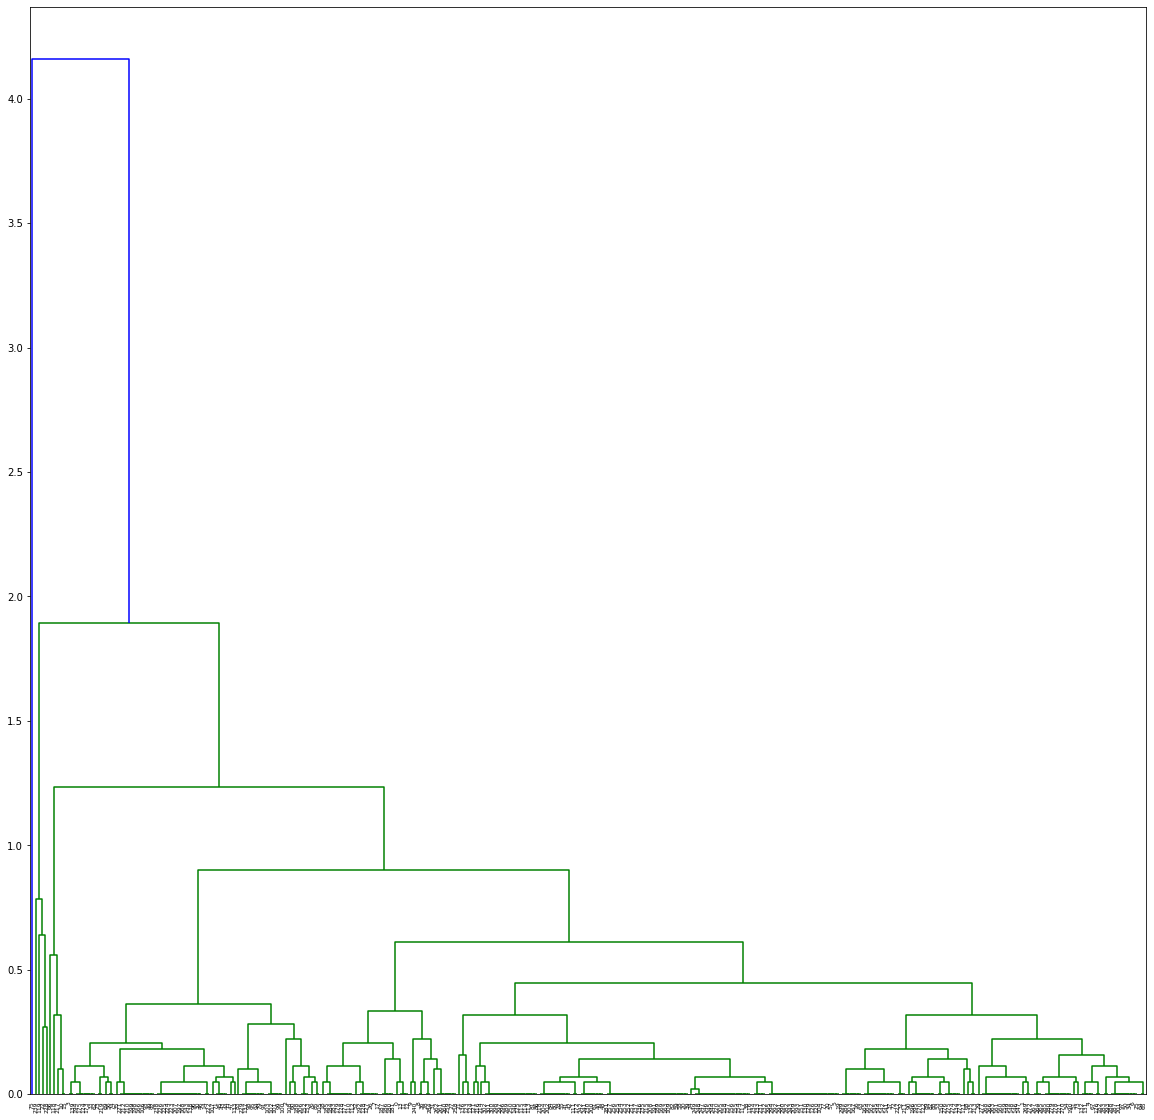

In [74]:
mergings = linkage(warps_wefts_list, method='complete')
fig, ax = pyplot.subplots(figsize=[20, 20])
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6, ax=ax)
pyplot.show()

In [75]:

# Построение дендрограммы;

warps_list = textiles.warp_nominal.tolist()
wefts_list = textiles.weft_nominal.tolist()

warps_dens_list = textiles['warp_dens'].tolist()
wefts_dens_list = textiles['weft_dens'].tolist()

warps_wefts_list = []
for num, item in enumerate(warps_list):
    warps_wefts_list.append((warps_dens_list[num], wefts_dens_list[num], warps_list[num], wefts_list[num]))
# print(mergings)

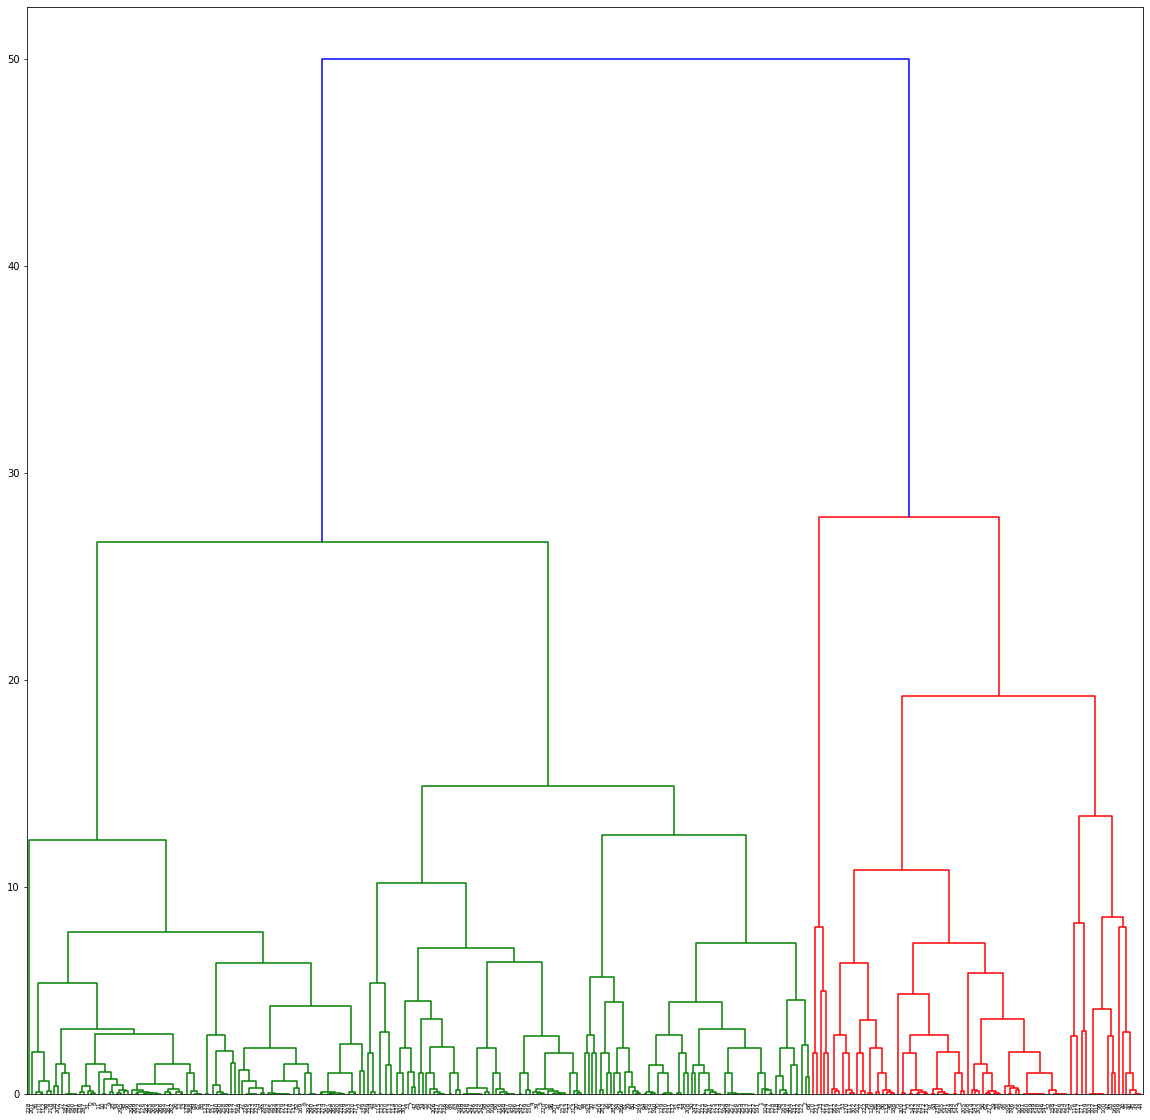

In [76]:
mergings = linkage(warps_wefts_list, method='complete')
fig, ax = pyplot.subplots(figsize=[20, 20])
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6, ax=ax)
pyplot.show()